In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

[Link to more info of Box plots](http://www.physics.csbsju.edu/stats/box2.html)

In [3]:
# Now we'll learn about box and violin plots
url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'

# Let's create two distributions
data1 = randn(100)
data2 = randn(100) + 2 #off mean
data2

array([ 1.44075785,  1.07189314,  0.65854704,  1.57373252,  0.1865521 ,
        1.34246697,  0.77211165,  2.33527544,  3.21813782,  0.533333  ,
        2.08387867,  3.13481077,  2.59015128,  3.92442398,  2.01670755,
        1.89849837,  0.58254774,  0.44547374,  2.93036761,  1.14302909,
        2.05385921,  1.96472277,  1.33487405,  1.66751945,  0.20374911,
        1.08770059, -0.18494086,  2.56147377,  2.46125458,  2.69215264,
        1.99182007,  2.14596292,  2.16470724,  1.54764928,  2.57740643,
        2.12134911,  1.21264133,  1.07939178, -1.37000191,  2.55728538,
        2.33362601,  2.48535434,  2.79657023,  2.60526997,  1.89295319,
       -0.67757985,  0.88707947,  2.16377807,  1.38962168,  3.33606966,
        1.51877938,  0.9851635 ,  3.19000492,  0.14298197,  2.84485044,
        0.97630602,  1.45389562,  1.91534089,  0.53819788, -0.10859602,
        1.51560746,  1.61716392,  1.35208584,  1.07716607,  1.04098566,
        2.64279785,  1.44257649,  3.5099427 ,  3.88750934,  0.82

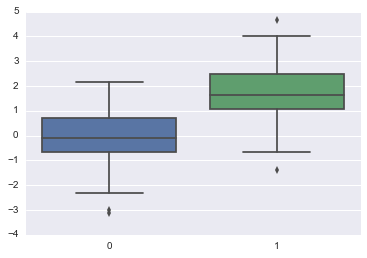

In [4]:
# Now we can create a box plot
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html
sns.boxplot(data=[data1,data2])

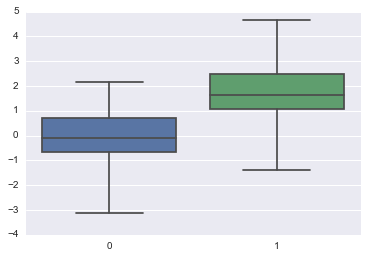

In [5]:
# Notice how the previous plot had outlier points, we can include those with the "whiskers"
sns.boxplot(data=[data1,data2],whis=np.inf)

/Users/starignus/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


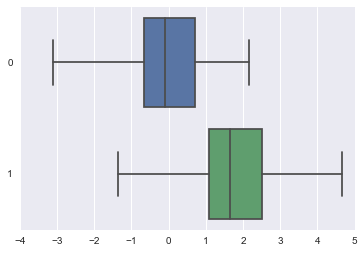

In [6]:
# WE can also set horizontal by setting vertical to false
sns.boxplot(data=[data1,data2],whis=np.inf, vert = False)

In [7]:
# While box plots are great, they can sometimes not give the full picture

# Violin/Viola plots can combine the simplicity of a box plot with the information of a kde plot

__Notes:__

The probability density function for gamma is:

```python
gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
```
for $x >= 0$, $a > 0$. Here gamma(a) refers to the gamma function.

gamma has a shape parameter _a_ which needs to be set explicitly.

When _a_ is an integer, gamma reduces to the Erlang distribution, and when _a=1_ to the exponential distribution.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, gamma.pdf(x, a, loc, scale) is identically equivalent to:
gamma.pdf(y, a) / scale; with y = (x - loc) / scale.

[More info wiki](https://en.wikipedia.org/wiki/Gamma_distribution); 
[seaborn](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html)

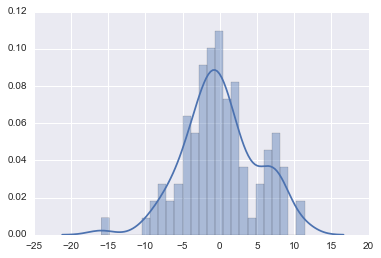

In [8]:
# Let's create an example where a box plot doesn't give the whole picture
# Generate random numbers: r = norm.rvs(size=1000)

# Normal Distribution (loc = 0, scale=5)
data1 = stats.norm(0,5).rvs(100)
sns.distplot(data1,bins=25)

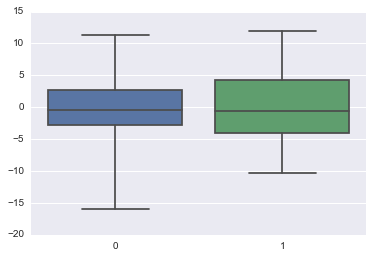

In [9]:
# Two gamma distributions concatenated together (Second one is inverted)
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

# Box plot them
sns.boxplot(data=[data1,data2],whis=np.inf)

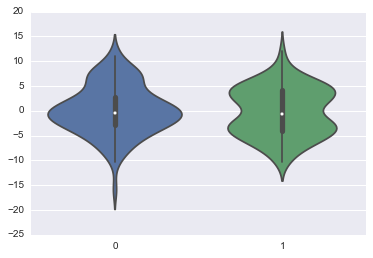

In [10]:
# From the above plots, you may think that the distributions are fairly similar
# But lets check out what a violin plot reveals
sns.violinplot(data=[data1,data2])

In [11]:
# Wow, quite revealing!

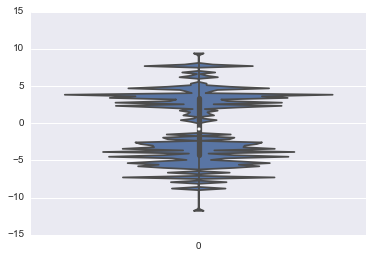

In [49]:
# We can also change the bandwidth of the kernel used for the density fit of the violin plots if desired
sns.violinplot(data=data2,bw=0.01)


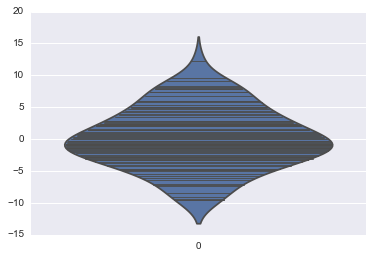

In [50]:
# Much like a rug plot, we can also include the individual points, or sticks
sns.violinplot(data=data1,inner="stick")

In [ ]:
# Next up: Multiple Regression Plots!